# Intro to Macro Data

First we need to load in some libraries, in particular:
- `numpy` and `pandas` for working with data
- `matplotlib` and `seaborn` for plotting data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

These are some standard options to supress warning messages (optional).

In [76]:
import warnings
warnings.filterwarnings('ignore')

This will make the graphs look better (optional).

In [ ]:
%matplotlib inline
sns.set(style='ticks', font_scale=1.3)
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

## Basic Plots

Here we plot the function $y = x \cdot (1-x)$

In [58]:
x = np.linspace(0, 1, 11)
print(x)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [59]:
y = x*(1-x)
print(y)

[0.   0.09 0.16 0.21 0.24 0.25 0.24 0.21 0.16 0.09 0.  ]


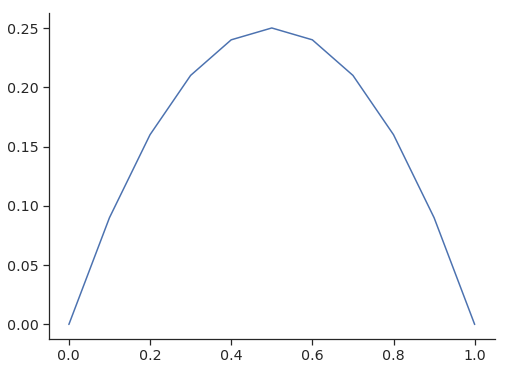

In [60]:
plt.plot(x, y);

## Loading Data

Let's load the real GDP series from FRED.

In [64]:
gdp = pd.read_excel('data/GDPCA.xls', index_col='Year')
gdp

,GDP
Year,
1929-01-01,1109.448
1930-01-01,1015.058
1931-01-01,950.037
1932-01-01,827.495
1933-01-01,817.265
1934-01-01,905.594
1935-01-01,986.231
1936-01-01,1113.291
1937-01-01,1170.344


Now we use the `pandas` plotting interface. This makes things easier.

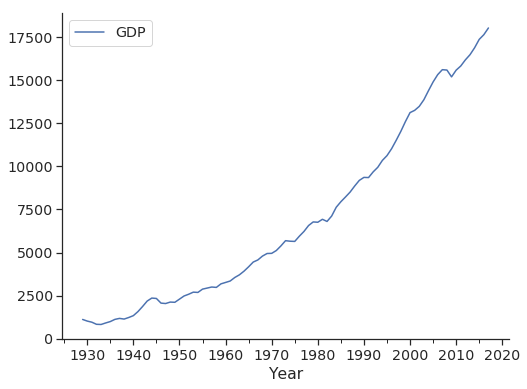

In [72]:
gdp.plot();

We can look at the difference in log values to get the growth rate.

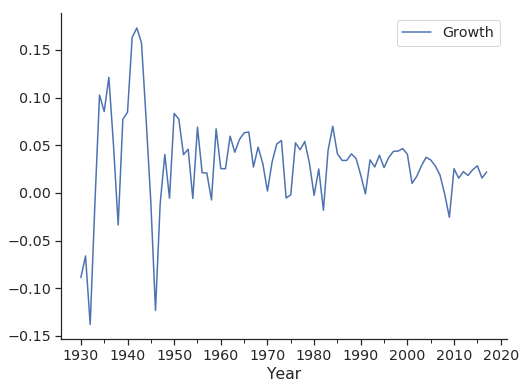

In [75]:
growth = np.log(gdp).diff()
growth = growth.rename(columns={'GDP': 'Growth'})
growth.plot();

## Complex Data

Ok, now let's look a situation with multiple data series. In this case, we'll have real GDP for multiple countries over many years. This comes from the Maddison Project's regional data.

In [78]:
mpd = pd.read_excel('data/mpd2018_region_data.xlsx', sheet_name='Long data')
mpd

,region,region_name,year,cgdppc,rgdpnapc,pop
0,af,Africa,1870,NaN,NaN,NaN
1,af,Africa,1871,NaN,NaN,NaN
2,af,Africa,1872,NaN,NaN,NaN
3,af,Africa,1873,NaN,NaN,NaN
4,af,Africa,1874,NaN,NaN,NaN
5,af,Africa,1875,NaN,NaN,NaN
6,af,Africa,1876,NaN,NaN,NaN
7,af,Africa,1877,NaN,NaN,NaN
8,af,Africa,1878,NaN,NaN,NaN
9,af,Africa,1879,NaN,NaN,NaN


We need to get this in the right shape. Currently it's in "long" format, but we want "wide" format for plotting.

In [91]:
mpd1 = mpd[['region_name', 'year', 'cgdppc']]
mpd1 = mpd1.pivot('year', 'region_name')
mpd1 = mpd1['cgdppc']
mpd1

region_name,Africa,East Asia,Eastern Europe,Latin America,Western Asia,Western Europe,Western Offshoots,World
year,,,,,,,,
1870,NaN,811.0,NaN,943.0,NaN,2480.0,3692.0,1263.0
1871,NaN,NaN,NaN,NaN,NaN,2503.0,3779.0,NaN
1872,NaN,NaN,NaN,NaN,NaN,2626.0,3839.0,NaN
1873,NaN,NaN,NaN,NaN,NaN,2654.0,3960.0,NaN
1874,NaN,NaN,NaN,NaN,NaN,2761.0,3860.0,NaN
1875,NaN,NaN,NaN,NaN,NaN,2809.0,3961.0,NaN
1876,NaN,NaN,NaN,NaN,NaN,2764.0,3899.0,NaN
1877,NaN,NaN,NaN,NaN,NaN,2816.0,3951.0,NaN
1878,NaN,NaN,NaN,NaN,NaN,2834.0,4025.0,NaN


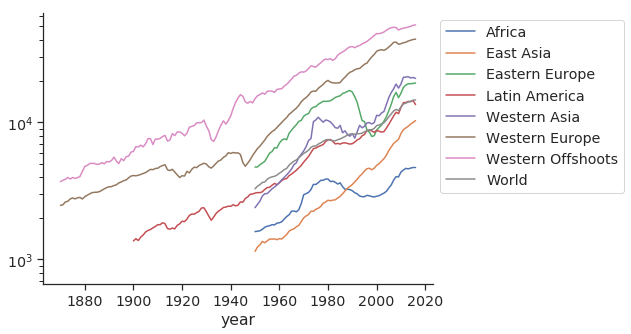

In [89]:
mpd1.plot(logy=True, figsize=(7, 5));
plt.legend(bbox_to_anchor=(1, 1)); # this puts the legend on the side